In [1]:
# import the different libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Arima ML Model

In [3]:
#open csv file
Data = pd.read_csv('C:/Users/pooja/OneDrive/Desktop/Sales Forecasting/4. Modeling/Retail Data_Modeling_Arima.csv')
Data

,Unnamed: 0,Store_id,Sales_Date,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Store_Dept,Weekly_Sales,Store_Type,Store_Size,Sales_Month,Sales_Year,Fuel_Price
0,0,1,2010-02-05,42.31,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,A,151315,2,2010,2.572
1,330761,35,2010-02-05,27.19,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,3,14612.19,B,103681,2,2010,2.784
2,330762,35,2010-02-05,27.19,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,4,26323.15,B,103681,2,2010,2.784
3,330763,35,2010-02-05,27.19,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,5,36414.63,B,103681,2,2010,2.784
4,330764,35,2010-02-05,27.19,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,6,11437.81,B,103681,2,2010,2.784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,128051,13,2012-10-26,46.97,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,49,7770.71,A,219622,10,2012,3.755
421566,128052,13,2012-10-26,46.97,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,50,1486.00,A,219622,10,2012,3.755
421567,128053,13,2012-10-26,46.97,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,52,4738.93,A,219622,10,2012,3.755
421568,390991,41,2012-10-26,41.80,4864.30,101.34,250.6,47.24,1524.43,199.219532,6.195,False,4,32699.78,A,196321,10,2012,3.686


In [4]:
#Change date to datetime format
Data['Sales_Date']=pd.to_datetime(Data['Sales_Date'])

In [5]:
Data = Data.drop(['Unnamed: 0'],axis=1)

In [41]:
#grab the colum that require for forecasting
Data1 = Data[["Sales_Date","Weekly_Sales"]]
#Data1

In [7]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Sales_Date    421570 non-null  datetime64[ns]
 1   Weekly_Sales  421570 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.4 MB


<AxesSubplot:>

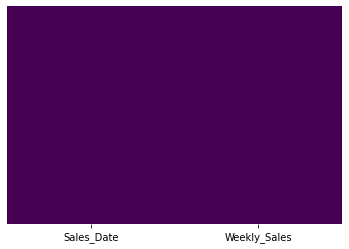

In [8]:
#Make sure there are no null values
sns.heatmap(Data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#Data1.set_index('Sales_Date',inplace=True)

In [10]:
#Data1.shape

In [11]:
#Data1

In [12]:
#lest take sum of the sales of different department and stores and do some analysis on monthly total sales
#sum of sales based on date
df_average_sales_week = Data.groupby(by=['Sales_Date'], as_index=False)['Weekly_Sales'].sum()
# sort the values
df_average_sales = df_average_sales_week.sort_values('Sales_Date', ascending=False)

In [42]:
df_average_sales

,Sales_Date,Weekly_Sales
142,2012-10-26,45544116.29
141,2012-10-19,45122410.57
140,2012-10-12,46128514.25
139,2012-10-05,47566639.31
138,2012-09-28,43734899.40
...,...,...
4,2010-03-05,46871470.30
3,2010-02-26,43968571.13
2,2010-02-19,48276993.78
1,2010-02-12,48336677.63


In [14]:
#plt.figure(figsize=(20,5))
#plt.plot(df_average_sales_week.Sales_Date, df_average_sales_week.Weekly_Sales)
#plt.show()

<AxesSubplot:xlabel='Sales_Date', ylabel='Weekly_Sales'>

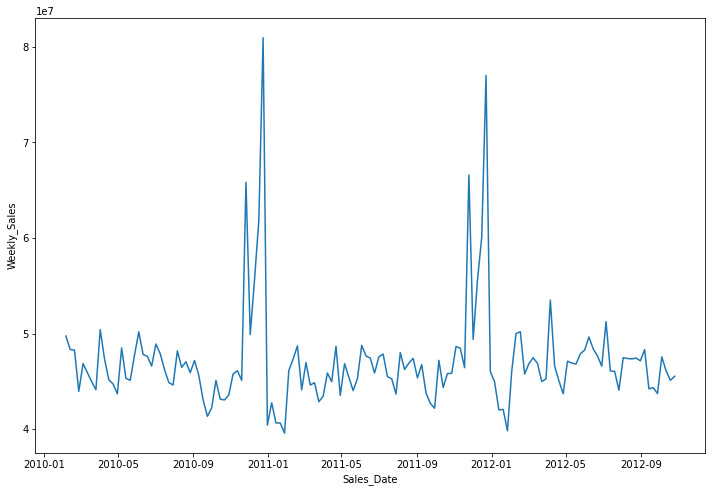

In [15]:
# To understand the pattern
plt.figure(figsize=(12,8))
sns.lineplot(data=df_average_sales, x='Sales_Date', y= 'Weekly_Sales')

In [43]:
data2 = df_average_sales_week.set_index('Sales_Date')
#data2

In [44]:
#data2

In [18]:
#data2.info()

In [19]:
#for backu
#ts.to_csv('C:/Users/pooja/OneDrive/Desktop/We cloud/ML/Project #2/test2.csv')

In [20]:
from statsmodels.tsa.stattools import adfuller

C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


#### Check dickey fuller test to see if the data is stationary or not

In [21]:
test_result = adfuller(data2['Weekly_Sales'])

In [22]:
#Ho : it is not stationary
#H1 : it is stationary

def adfuller_test(Weekly_Sales):
    result = adfuller(Weekly_Sales)
    labels=['ADF Test Statistic','P-value','#lags used','Number of observation used']
    for value,labels in zip(result,labels):
        print(labels+' : '+str(value) )
    if result[1]<=0.05:
        print("Reject null hypothesis(- it is stationary) ")
    else:
        print("Accept null hypothesis (- it is not stationary)")

In [23]:
adfuller_test(data2["Weekly_Sales"])

ADF Test Statistic : -5.908297957186334
P-value : 2.675979158986027e-07
#lags used : 4
Number of observation used : 138
Reject null hypothesis(- it is stationary) 


##### Based on above test we can see our data is stationary

In [24]:
#Spliting the dataset into train and test
train = data2[:133]
test = data2[-10:]

Text(0, 0.5, 'Weekly_Sales')

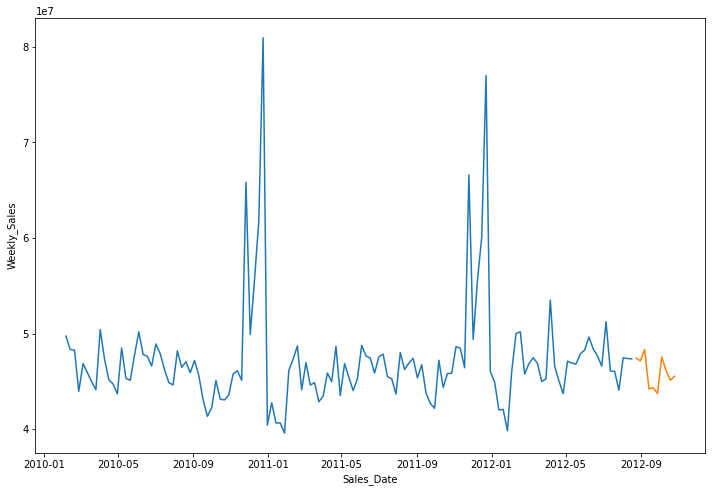

In [25]:
#plot graph of train and test
plt.figure(figsize=(12,8))
plt.plot(train)
plt.plot(test)
plt.xlabel('Sales_Date')
plt.ylabel('Weekly_Sales')

In [26]:
from pmdarima.arima import auto_arima

In [27]:
# Use Auto arima model

In [28]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4203.649, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4157.789, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4138.259, Time=0.38 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4180.279, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4140.178, Time=0.36 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4140.170, Time=0.95 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4154.107, Time=0.18 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4142.137, Time=2.41 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4139.959, Time=0.12 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=4140.007, Time=0.51 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=4147.818, Time=0.46 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4141.238, Time=0.28 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=4141.295, Time=1.80 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=4140.301, Time=0.40 sec

Best model:  ARIMA

In [29]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  133
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2066.129
Date:                            Sat, 23 Apr 2022   AIC                           4138.259
Time:                                    15:54:43   BIC                           4146.621
Sample:                                         0   HQIC                          4141.655
                                            - 133                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3705      0.086     -4.294      0.000      -0.540      -0.201
ma.S.L12      -0.7729      0.197     -3.923      0.000      -1.159      -0.387
sigma2      7.503e+13      2e-15   3.75e+28      0.000     7.5e+13     7.5e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):               210.75
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.54
Prob(H) (two-sided):                  0.12   Kurtosis:                         9.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.37e+44. Standard errors may be unstable.
"""

In [45]:
#prediction of the provided sales date
prediction = pd.DataFrame(arima_model.predict(n_periods = 10),index=test.index)
prediction.columns = ['predicted_sales']
#prediction

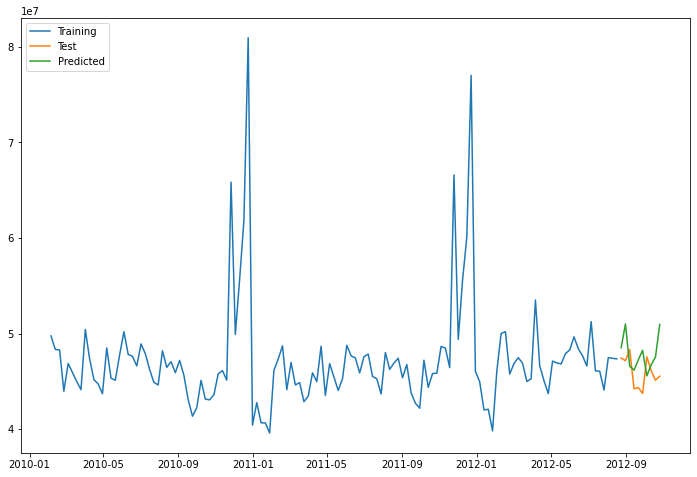

In [31]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [32]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

from statsmodels.tsa.arima.model import ARIMA

C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'


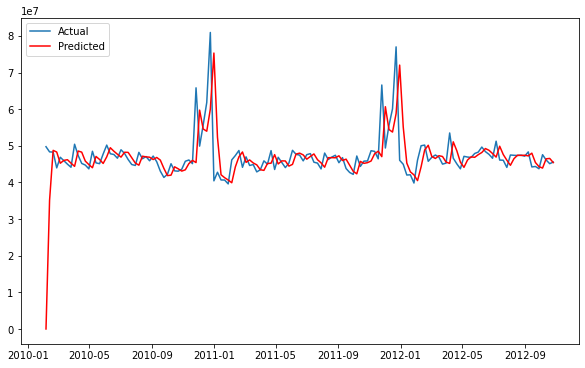

In [33]:
# AR+I+MA = ARIMA model
model = ARIMA(data2, order=(1,1,0))
results_ARIMA = model.fit()
plt.plot(data2,label="Actual")
plt.plot(results_ARIMA.fittedvalues, label="Predicted",color='red')
plt.legend(loc = 'upper left')
#plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
#print('Plotting ARIMA model')

In [34]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Sales_Date
2010-02-05    0.000000e+00
2010-02-12    3.512479e+07
2010-02-19    4.875239e+07
2010-02-26    4.829454e+07
2010-03-05    4.523518e+07
dtype: float64


In [35]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Sales_Date
2010-02-05    0.000000e+00
2010-02-12    3.512479e+07
2010-02-19    8.387718e+07
2010-02-26    1.321717e+08
2010-03-05    1.774069e+08
                  ...     
2012-09-28    6.496083e+09
2012-10-05    6.540000e+09
2012-10-12    6.586440e+09
2012-10-19    6.632991e+09
2012-10-26    6.678410e+09
Length: 143, dtype: float64


In [36]:
predictions_ARIMA_log = pd.Series(data2['Weekly_Sales'].iloc[0], index=data2.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.tail()

Sales_Date
2012-09-28    6.545834e+09
2012-10-05    6.589751e+09
2012-10-12    6.636191e+09
2012-10-19    6.682742e+09
2012-10-26    6.728160e+09
dtype: float64

C:\Users\pooja\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


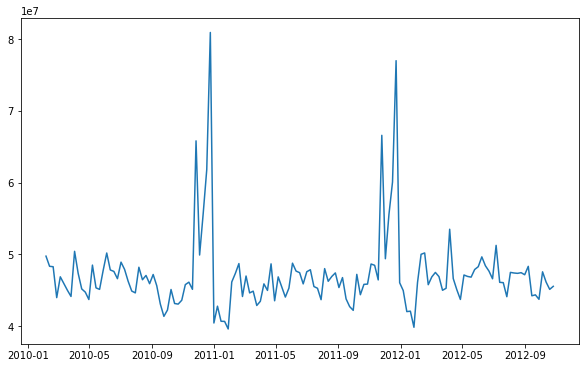

In [37]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data2)
plt.plot(predictions_ARIMA)

In [38]:
#predict forecast values
index_future_dates = pd.date_range(start='2012-10-19', end='2013-02-19',freq='W')
pred = results_ARIMA.predict(start=104,end=121,typ='levels')
pred.index = index_future_dates
print(pred)

2012-10-21    4.049527e+07
2012-10-28    4.424802e+07
2012-11-04    4.885587e+07
2012-11-11    5.014189e+07
2012-11-18    4.707255e+07
2012-11-25    4.654073e+07
2012-12-02    4.729835e+07
2012-12-09    4.707171e+07
2012-12-16    4.555463e+07
2012-12-23    4.519082e+07
2012-12-30    5.108298e+07
2013-01-06    4.864983e+07
2013-01-13    4.553018e+07
2013-01-20    4.411536e+07
2013-01-27    4.612248e+07
2013-02-03    4.698418e+07
2013-02-10    4.685391e+07
2013-02-17    4.757833e+07
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [39]:
#predict forecast values and actual value combine
future_df=pd.concat([data2,pred])
future_df.rename(columns={0:"forecast"},inplace=True)
future_df

,Weekly_Sales,forecast
2010-02-05,49750740.50,NaN
2010-02-12,48336677.63,NaN
2010-02-19,48276993.78,NaN
2010-02-26,43968571.13,NaN
2010-03-05,46871470.30,NaN
...,...,...
2013-01-20,NaN,4.411536e+07
2013-01-27,NaN,4.612248e+07
2013-02-03,NaN,4.698418e+07
2013-02-10,NaN,4.685391e+07


<AxesSubplot:>

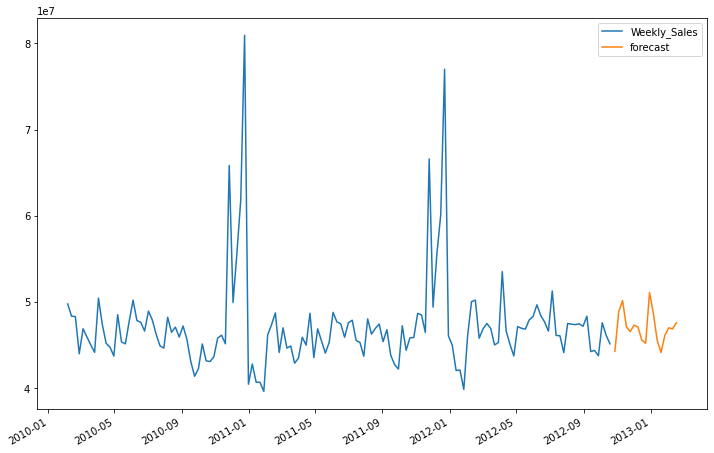

In [40]:
#Actual and forecast predictions
future_df[['Weekly_Sales', 'forecast']].plot(figsize=(12, 8))